**Introduction**

this notebook aim to introduce and explain the concept of regularization in deep learning.




In this tutorial, we will cover:



1.    What is Regularization?
2.   How does Regularization help in reducing Overfitting?
3.   Different Regularization techniques in Deep Learning       

       *   L2 and L1 regularization
       *   Dropout
    











               










**What is bias?**

Bias is the difference between the average prediction of our model 
and the correct value which we are trying to predict. Model with high bias oversimplifies the model. It always leads to high error on training and test data. 

**What is variance?**

Variance It's a variability of model prediction for a given data which tells the spread of the data. A very high variance means a very complex model resulting in overfitting.

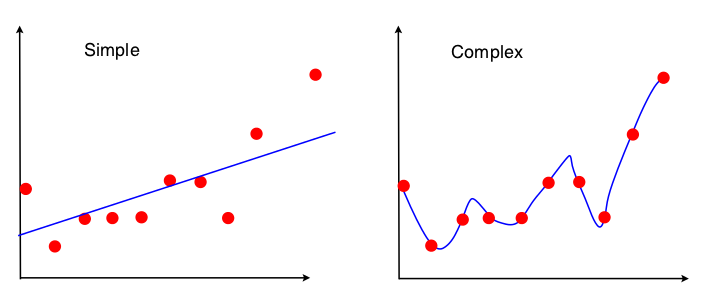

# Bias and variance using bulls-eye diagram



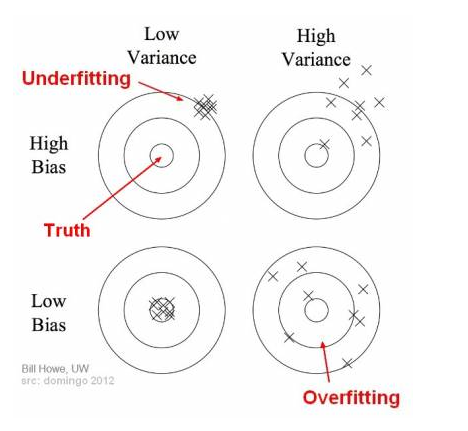

In the above diagram, center of the target is a model that perfectly predicts correct values. As we move away from the bulls-eye our predictions become get worse and worse. 


# What is Regularization?

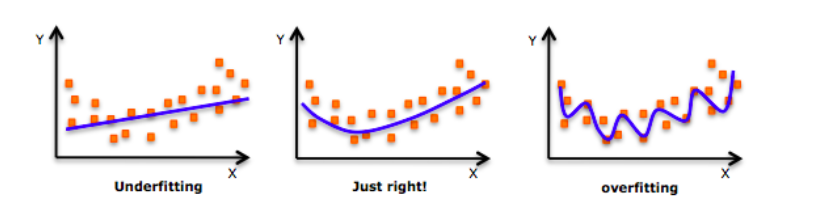


As we move towards the right in this image, our model tries to learn too well the details and the noise from the training data, which ultimately results in poor performance on the unseen data.

In other words, while going towards the right, the complexity of the model increases such that the training error reduces but the testing error doesn’t. This is .

**Regularization** is a technique which makes slight modifications to the learning algorithm such that the model generalizes better. This in turn improves the model’s performance on the unseen data as well.



# How does Regularization help reduce Overfitting?

minimize this MSE function. It means that your parameters can be updated in any way, just to lower the MSE value.  the larger your parameters become, the higher the chance your model overfits the data. we can restrict the parameters not to become too large by adding the regularization term like below:

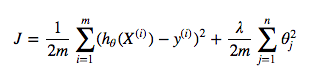


where,

* hθ(X(i)) is the learned prediction given on the i-th input parameter Xi
* y(i) is the original prediction
* m is the total number of input sample

In This tutorial we use the Anderson Iris flower (iris) dataset for demonstration. The dataset contains a set of 150 records under five attributes: sepal length, sepal width, petal length, petal width, and class (known as target from sklearn datasets).
First, let’s import the libraries and obtain iris dataset from scikit-learn library.

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris = load_iris()

# Exploring data


In [ ]:
# Load data into a DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)
# Convert datatype to float
df = df.astype(float)
# append "target" and name it "label"
df['label'] = iris.target
# Use string label instead
df['label'] = df.label.replace(dict(enumerate(iris.target_names)))

In [ ]:
df.head()

# Preparing data 

In [ ]:
# label -> one-hot encoding
label = pd.get_dummies(df['label'], prefix='label')
df = pd.concat([df, label], axis=1)
# drop old label
df.drop(['label'], axis=1, inplace=True)

In [ ]:
df.head()

In [ ]:
# Creating X and y
X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
# Convert DataFrame into np array
X = np.asarray(X)
y = df[['label_setosa', 'label_versicolor', 'label_virginica']]
# Convert DataFrame into np array
y = np.asarray(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)

# Build an unregularized neural network model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
def create_model(): 
    model = Sequential([
        Dense(64, activation='relu', input_shape=(4,)),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(3, activation='softmax')
    ])
    return model

In [ ]:
model = create_model()
model.summary()

In order to train a model, we first have to configure our model using `compile()` and pass the following arguments:


1.   Use Adam (`adam`) optimization algorithm as the optimizer
1.   Use categorical cross-entropy loss function (`categorical_crossentropy`) for our multiple-class classification problem
2.   For simplicity, use `accuracy` as our evaluation metrics to evaluate the model during training and testing.




In [ ]:
model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

In [ ]:
history = model.fit(                      #fit the model 
    X_train, 
    y_train, 
    epochs=10, 
    validation_split=0.25, 
    batch_size=40, 
    verbose=2
)

# Model Evaluation

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

In [ ]:
plot_metric(history, 'accuracy')

In [ ]:
plot_metric(history, 'loss')

From the above graph, we can see that the model has overfitted the training datat.

In [ ]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test, verbose=2)

# Different Regularization techniques in Deep Learning

# **L2 & L1 regularization**

L1 and L2 are the most common types of regularization. These update the general cost function by adding another term known as the regularization term.

**Cost function = Loss (say, binary cross entropy) + Regularization term**

Due to the addition of this regularization term, the values of weight matrices decrease because it assumes that a neural network with smaller weight matrices leads to simpler models. Therefore, it will also reduce **overfitting** to quite an extent.

# Dropout

So what does dropout do? At every iteration, it randomly selects some nodes and removes them along with all of their incoming and outgoing connections.


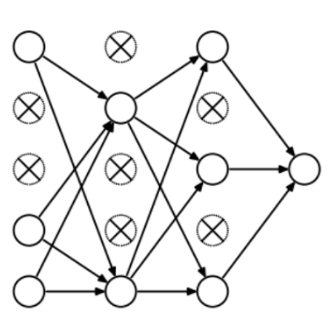



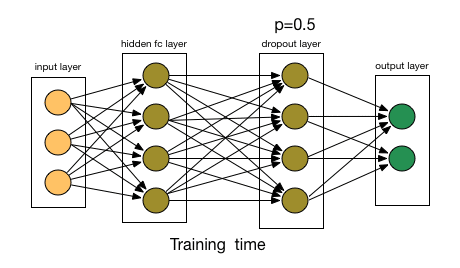

# Adding L2 regularization and Dropout

In [ ]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2

we create a function called **create_regularized_model()** and it will return a model similar to the one we built before. But, this time we will add **L2 regularization** and **Dropout** layers, so this function takes 2 arguments: a L2 regularization **factor** and a Dropout **rate**




1.   Let’s add L2 regularization in all layers except the output layer.
2.   Let’s add Dropout layer between every two dense layers.



In [ ]:
def create_regularized_model(factor, rate):
    model = Sequential([
        Dense(64, kernel_regularizer=l2(factor), activation="relu", input_shape=(4,)),
        Dropout(rate),
        Dense(128, kernel_regularizer=l2(factor), activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer=l2(factor), activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer=l2(factor), activation="relu"),
        Dropout(rate),
        Dense(64, kernel_regularizer=l2(factor), activation="relu"),
        Dropout(rate),
        Dense(64, kernel_regularizer=l2(factor), activation="relu"),
        Dropout(rate),
        Dense(64, kernel_regularizer=l2(factor), activation="relu"),
        Dropout(rate),
        Dense(3, activation='softmax')
    ])
    return model

Let’s create the model with arguments L2 factor 0.0001 and Dropout rate 0.3

In [ ]:
# Re-build the model with weight decay and dropout layers
model = create_regularized_model(1e-5, 0.3)
model.summary()

In [ ]:
# Compile the model
model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

In [ ]:
# Train the model, with some of the data reserved for validation
history = model.fit(
    X_train, 
    y_train, 
    epochs=200, 
    validation_split=0.25, 
    batch_size=40, 
    verbose=2
)

In [ ]:
plot_metric(history, 'loss')

In [ ]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test, verbose=2)